In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('diabetes.csv')
df.head(3)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [56]:
def get_clf_eval(y_test, pred, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('confusion matrix')
    print(confusion)
    print(f"accuracy: {accuracy:.4f}, precision: {precision:.4f}, recall: {recall:.4f}, \
f1: {f1:.4f}, auc: {roc_auc:.4f}")

In [7]:
def precision_recall_curve_plot(y_test, pred_proba):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='presicion')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    print(start, end)
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold values')
    plt.ylabel('Precision and Recall value')
    plt.show()

In [8]:
# Logistic Regression fit and predict 

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=156, stratify = y)
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

confusion matrix
[[88 12]
 [23 31]]
accuracy: 0.7727
precision: 0.7209
recall: 0.5741
f1: 0.6392
auc: 0.7919


C:\Users\hmkang\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-0.031902421127287015 1.0382832286151147


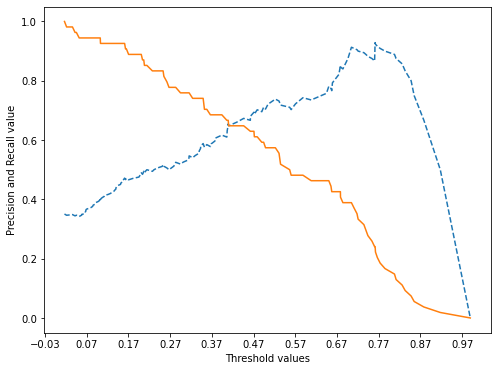

In [9]:
# precision and recall graph
precision_recall_curve_plot(y_test, pred_proba)

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

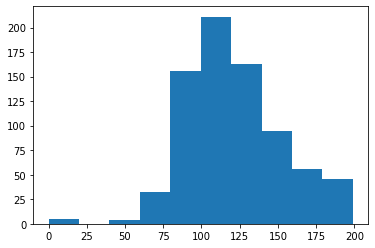

In [11]:
plt.hist(df.Glucose, bins=10)

In [12]:
# 0 값이 있는 피처가 얼마나 있는지?

zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] # 0이 나올수 없는 피쳐들

total_count = df.Glucose.count()

for feature in zero :
    zero_count = df[df[feature] == 0][feature].count()
    print(f'{feature} - zero: {zero_count}, percent: {zero_count/total_count*100:.2f}%')

Glucose - zero: 5, percent: 0.65%
BloodPressure - zero: 35, percent: 4.56%
SkinThickness - zero: 227, percent: 29.56%
Insulin - zero: 374, percent: 48.70%
BMI - zero: 11, percent: 1.43%


In [16]:
# 0 값을 평균값으로 대체 

df[zero] = df[zero].replace(0, df[zero].mean())

In [19]:
df[zero]
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
# StandardScaler, fit, predict

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,
                                                   random_state = 156, stratify=y)
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

pred_proba = lr.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, pred, pred_proba)

confusion matrix
[[90 10]
 [21 33]]
accuracy: 0.7987
precision: 0.7674
recall: 0.6111
f1: 0.6804
auc: 0.8433


In [54]:
# thresholds changes

from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba, thresholds):
    for custom_threshold in thresholds:
        custom_threshold = round(custom_threshold, 2)
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba)
        custom_predict = binarizer.transform(pred_proba)
        print('threshold', custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba)
        print('-'*50)
        

In [57]:
thresholds = np.arange(0.3, 0.50, 0.03) 
thresholds = np.append(thresholds, 0.5)
pred_proba = lr.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

threshold 0.3
confusion matrix
[[67 33]
 [11 43]]
accuracy: 0.7143, precision: 0.5658, recall: 0.7963, f1: 0.6615, auc: 0.8433
--------------------------------------------------
threshold 0.33
confusion matrix
[[72 28]
 [12 42]]
accuracy: 0.7403, precision: 0.6000, recall: 0.7778, f1: 0.6774, auc: 0.8433
--------------------------------------------------
threshold 0.36
confusion matrix
[[76 24]
 [15 39]]
accuracy: 0.7468, precision: 0.6190, recall: 0.7222, f1: 0.6667, auc: 0.8433
--------------------------------------------------
threshold 0.39
confusion matrix
[[78 22]
 [16 38]]
accuracy: 0.7532, precision: 0.6333, recall: 0.7037, f1: 0.6667, auc: 0.8433
--------------------------------------------------
threshold 0.42
confusion matrix
[[84 16]
 [18 36]]
accuracy: 0.7792, precision: 0.6923, recall: 0.6667, f1: 0.6792, auc: 0.8433
--------------------------------------------------
threshold 0.45
confusion matrix
[[85 15]
 [18 36]]
accuracy: 0.7857, precision: 0.7059, recall: 0.6667, f1